In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\deor\\b_depressed.csv')
dataset.head(5)

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [5]:
dataset.no_lasting_investmen.value_counts()

28292707.0    425
11121784.0      3
3558971.0       3
20019212.0      3
60724945.0      3
             ... 
14723019.0      1
20464084.0      1
25046258.0      1
24094234.0      1
13012488.0      1
Name: no_lasting_investmen, Length: 939, dtype: int64

In [6]:
dataset.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


In [7]:
dataset = dataset[~(dataset.no_lasting_investmen.isnull())]
dataset= dataset.drop(['Survey_id','Ville_id'],axis=1)

In [8]:
dataset.depressed.value_counts()

0    1174
1     235
Name: depressed, dtype: int64

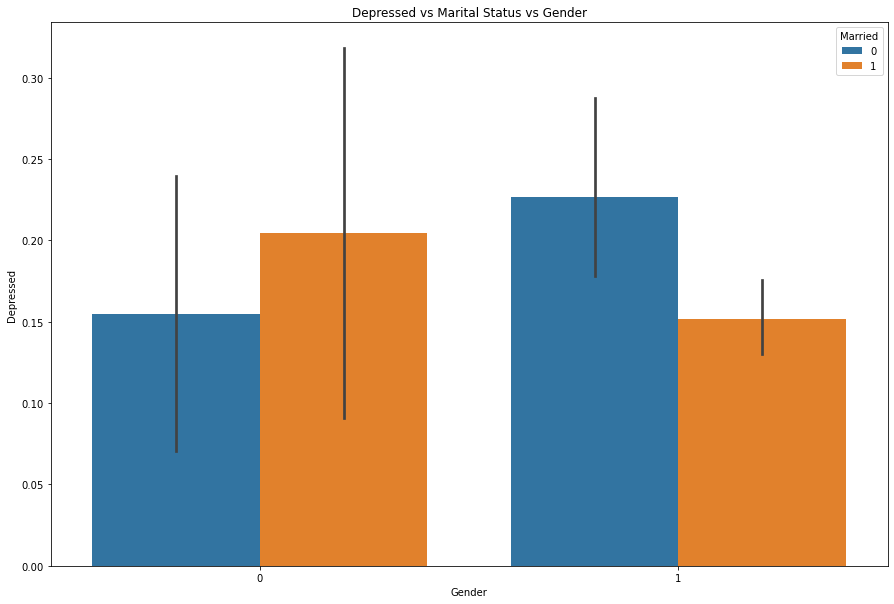

In [10]:
plt.figure(figsize=(15,10))
sns.barplot(x='sex',y='depressed',hue='Married',data=dataset)
plt.title('Depressed vs Marital Status vs Gender')
plt.xlabel('Gender')
plt.ylabel('Depressed')
plt.show()

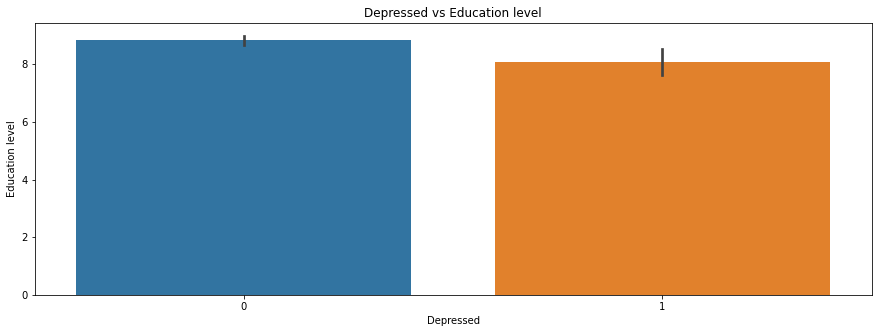

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='education_level',data=dataset)
plt.title('Depressed vs Education level')
plt.xlabel('Depressed')
plt.ylabel('Education level')
plt.show()

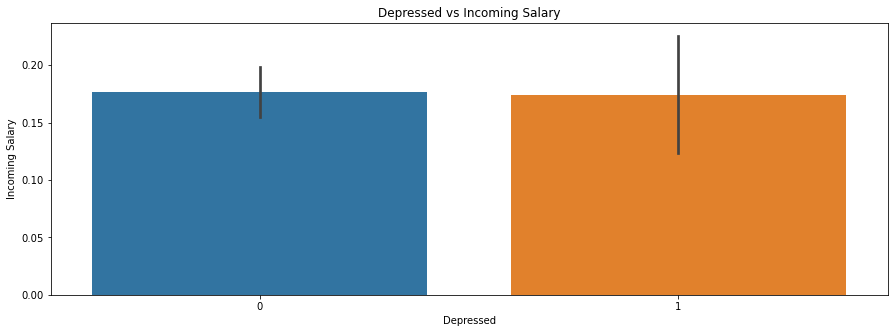

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='incoming_salary',data=dataset)
plt.title('Depressed vs Incoming Salary')
plt.xlabel('Depressed')
plt.ylabel('Incoming Salary')
plt.show()

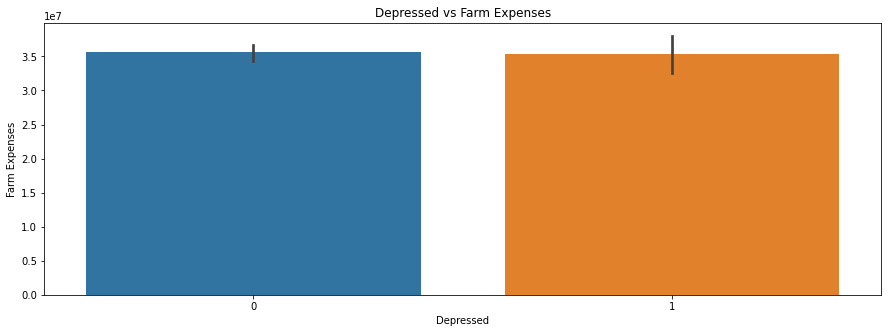

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='farm_expenses',data=dataset)
plt.title('Depressed vs Farm Expenses')
plt.xlabel('Depressed')
plt.ylabel('Farm Expenses')
plt.show()

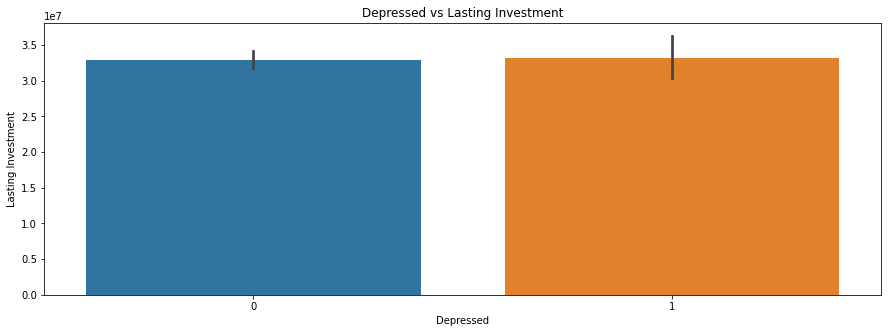

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='lasting_investment',data=dataset)
plt.title('Depressed vs Lasting Investment')
plt.xlabel('Depressed')
plt.ylabel('Lasting Investment')
plt.show()

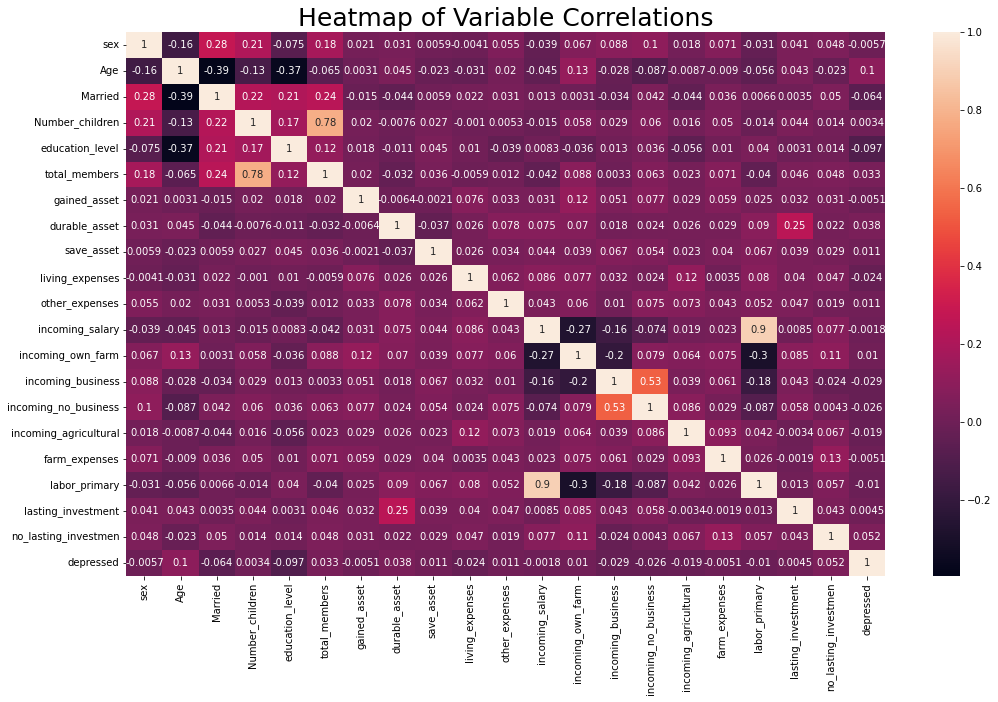

In [15]:
plt.figure(figsize=(17,10))
sns.heatmap(dataset.corr(),annot=True)
plt.title('Heatmap of Variable Correlations',fontsize=25)
plt.show()

In [16]:
dataset['Number_children'] = dataset['Number_children'].apply(lambda x: str(x)+' children')
dataset['education_level'] = dataset['education_level'].apply(lambda x: str(x)+' education level')
dataset['total_members'] = dataset['total_members'].apply(lambda x: str(x)+' family members')
dataset.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4 children,10 education level,5 family members,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3 children,8 education level,5 family members,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3 children,9 education level,5 family members,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2 children,10 education level,4 family members,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4 children,10 education level,6 family members,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [18]:
data = pd.get_dummies(dataset['Number_children'],drop_first=False)
dataset = pd.concat([dataset,data],axis=1)
dataset.drop('Number_children',axis=1,inplace=True)

data = pd.get_dummies(dataset['education_level'],drop_first=False)
dataset = pd.concat([dataset,data],axis=1)
dataset.drop('education_level',axis=1,inplace=True)

data = pd.get_dummies(dataset['total_members'],drop_first=False)
dataset = pd.concat([dataset,data],axis=1)
dataset.drop('total_members',axis=1,inplace=True)

In [24]:
from sklearn.model_selection import train_test_split
X = dataset.drop('depressed',axis=1)
y = dataset['depressed']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=3)
X_train.head()

,sex,Age,Married,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,...,11 family members,12 family members,2 family members,3 family members,4 family members,5 family members,6 family members,7 family members,8 family members,9 family members
502,1,19,1,28912201,22861940,23399979,26692283,28203066,0,0,...,0,0,0,0,0,1,0,0,0,0
112,1,19,1,96143182,17136445,23399979,17383348,79756546,0,1,...,0,0,0,0,0,0,0,1,0,0
1125,1,26,1,47157024,33087753,89686073,2936151,84881458,1,0,...,0,0,0,0,0,0,0,1,0,0
521,1,23,1,20651573,16655984,16015369,40038424,10329914,0,0,...,0,0,0,0,0,1,0,0,0,0
701,1,31,0,28912201,25464438,11210759,21754211,5123317,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
Model = RandomForestClassifier(random_state=100,n_jobs=-1)

params = {'max_depth':[3,5,10,12,15],
         'min_samples_leaf':[60,70,80,90,100,120,130],
         'n_estimators':[200], 
         'max_features': [0.05,0.1,0.15,0.2],
         'criterion': ["gini"]}

grid_search = GridSearchCV(param_grid=params,estimator=Model,n_jobs=-1,verbose=1,scoring='recall')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 10, 12, 15],
                         'max_features': [0.05, 0.1, 0.15, 0.2],
                         'min_samples_leaf': [60, 70, 80, 90, 100, 120, 130],
                         'n_estimators': [200]},
             scoring='recall', verbose=1)

In [26]:
Model_best = grid_search.best_estimator_
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve

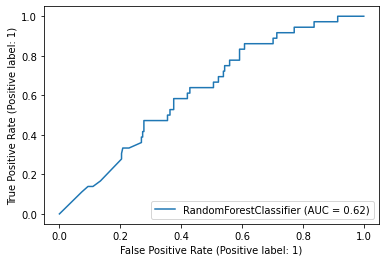

Accuracy:  0.8718861209964412
Recall:  0.0


In [27]:
plot_roc_curve(Model_best,X_train,y_train)
plt.show()
y_train_pred = Model_best.predict(X_train)
print("Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))


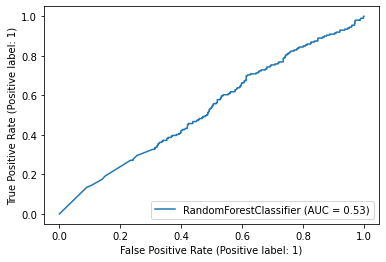

Accuracy:  0.8235815602836879
Recall:  0.0


In [28]:
plot_roc_curve(Model_best,X_test,y_test)
plt.show()
y_test_pred = Model_best.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))

In [29]:
Feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': Model_best.feature_importances_})
Feature_importance = Feature_importance.sort_values(by='Importance',ascending=False)
Feature_importance.set_index('Feature',inplace=True)
Feature_importance.head()

,Importance
Feature,
lasting_investment,0.224490
other_expenses,0.163265
living_expenses,0.139625
no_lasting_investmen,0.122449
5 family members,0.087783


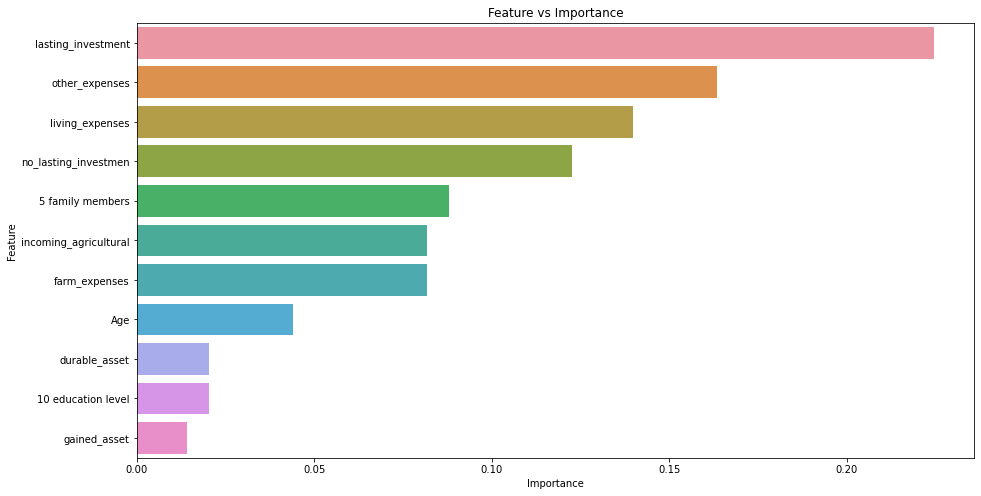

In [30]:
Feature_importance = Feature_importance[Feature_importance.Importance!=0]
plt.figure(figsize=(15,8))
sns.barplot(y=Feature_importance.index,x=Feature_importance.Importance)
plt.title('Feature vs Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()